In [19]:
%pylab inline

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#from matplotlib.pyplot import *
import scipy as sp
from scipy import constants

import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'session-6')
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

figsize(4, 4)

def plotBlochWave1D(pw_params, removeaxis=True):
    fig = None
    xylims, E_bloch, L_p, L_x, Nx = pw_params['xylims'], pw_params['E_bloch'], \
    pw_params['L_p'], pw_params['L_x'], pw_params['Nx']

    x = np.linspace(0.0, L_x, Nx)
    y = np.real(E_bloch(x))

    plt.plot(x, y)
    if xylims!=None:
        xlim(xylims[0])
        ylim(xylims[1])

        
    if removeaxis:
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
    return fig


def animateBlochWave1D(pw_params, N_phase=12,
                    file_name=None, fps=10, dpi=100):
    fig = None
    xylims, E_bloch, L_p, L_x, Nx = pw_params['xylims'], pw_params['E_bloch'], \
    pw_params['L_p'], pw_params['L_x'], pw_params['Nx']

    x = np.linspace(0.0, L_x, Nx)
    y = E_bloch(x)

    
    def animate_E(i):
        plt.clf()
        phi_i = float(i)*2.0*np.pi/N_phase
        
        y_i = np.real(np.exp(1j*phi_i)*y)
        
        fig = plt.plot(x, y_i)
            
        if xylims!=None:
            xlim(xylims[0])
            ylim(xylims[1])
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
        return fig

    fig = plt.figure()
    anim = animation.FuncAnimation(fig, animate_E, frames=N_phase, interval=1, repeat=True)
    #file_ext = '.gif'
    #file_name = os.path.join(dir_name, 'plane-wave-timeharmonic'+file_ext)
    if file_name!=None:
        anim.save(file_name+'.gif', writer="imagemagick", fps=fps, dpi=dpi)
    return anim


Populating the interactive namespace from numpy and matplotlib


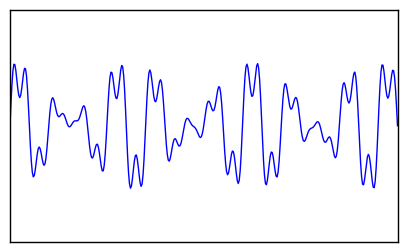

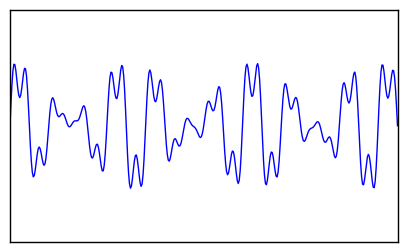

In [23]:
do_bloch_wave1d_plot = True
figsize(5, 3)
if do_bloch_wave1d_plot:
    
    L_p = 1.0
    L_x = 10.0*L_p
    def E_bloch(x):
        beta = 1.0
        y_p = np.sin(2.0*np.pi/L_p*x) + 0.5*np.sin(3.0*2.0*np.pi/L_p*x)
        return np.exp(-1j*beta*x)*y_p
    
    pws = {'xylims':[[0, L_x], [-2, 2]], 'E_bloch':E_bloch, 'L_p':L_p, 'L_x':L_x, 'Nx':400}

    plotBlochWave1D(pws)
    file_name = os.path.join(dir_name, 'bloch-wave-timeharmonic'+file_ext)
    savefig(file_name)
    show()

    file_name = os.path.join(dir_name, 'bloch-wave-timeharmonic')
    animateBlochWave1D(pws, N_phase=20, file_name=file_name, fps=10, dpi=100)
    show()
